In [78]:
#Imports
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [60]:
df = pd.read_csv('weight-height.csv')
ohe = OneHotEncoder(sparse = False)
arr = ohe.fit_transform(df.Gender.values.reshape(-1, 1)) # Returns array of encoded feature
new_features_name = ohe.categories_[0].tolist() # i.e. 'Female' and 'Male'
df_encoded = pd.DataFrame(data = arr, columns = new_features_name)
df_encoded[['Height', 'Weight']] = df.iloc[:, 1:3]
df_encoded.head()

,Female,Male,Height,Weight
0,0.0,1.0,73.847017,241.893563
1,0.0,1.0,68.781904,162.310473
2,0.0,1.0,74.110105,212.740856
3,0.0,1.0,71.730978,220.042470
4,0.0,1.0,69.881796,206.349801


In [76]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [61]:
df_encoded.head()

,Female,Male,Height,Weight
0,0.0,1.0,73.847017,241.893563
1,0.0,1.0,68.781904,162.310473
2,0.0,1.0,74.110105,212.740856
3,0.0,1.0,71.730978,220.042470
4,0.0,1.0,69.881796,206.349801


In [62]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
Female    10000 non-null float64
Male      10000 non-null float64
Height    10000 non-null float64
Weight    10000 non-null float64
dtypes: float64(4)
memory usage: 312.6 KB


In [63]:
df_encoded.describe()

,Female,Male,Height,Weight
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.500000,0.500000,66.367560,161.440357
std,0.500025,0.500025,3.847528,32.108439
min,0.000000,0.000000,54.263133,64.700127
25%,0.000000,0.000000,63.505620,135.818051
50%,0.500000,0.500000,66.318070,161.212928
75%,1.000000,1.000000,69.174262,187.169525
max,1.000000,1.000000,78.998742,269.989699


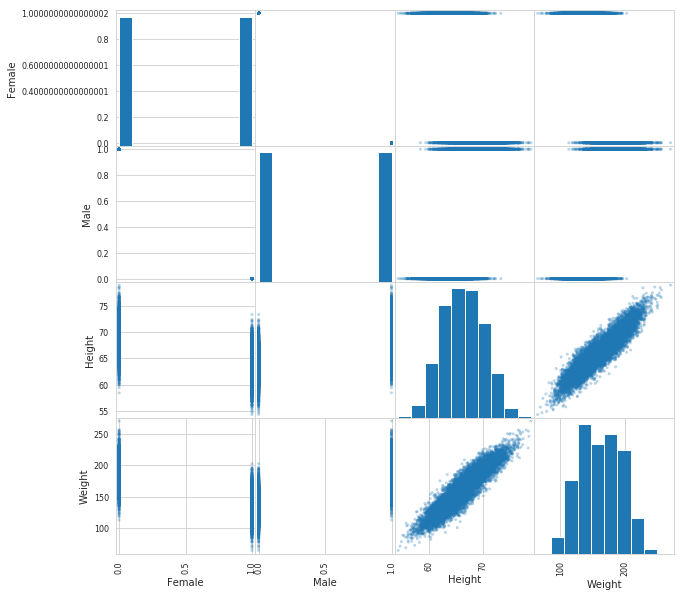

In [64]:
# Analysing relation between every pair of feature
pd.plotting.scatter_matrix(df_encoded, alpha = 0.3, figsize=(10, 10))
plt.show()

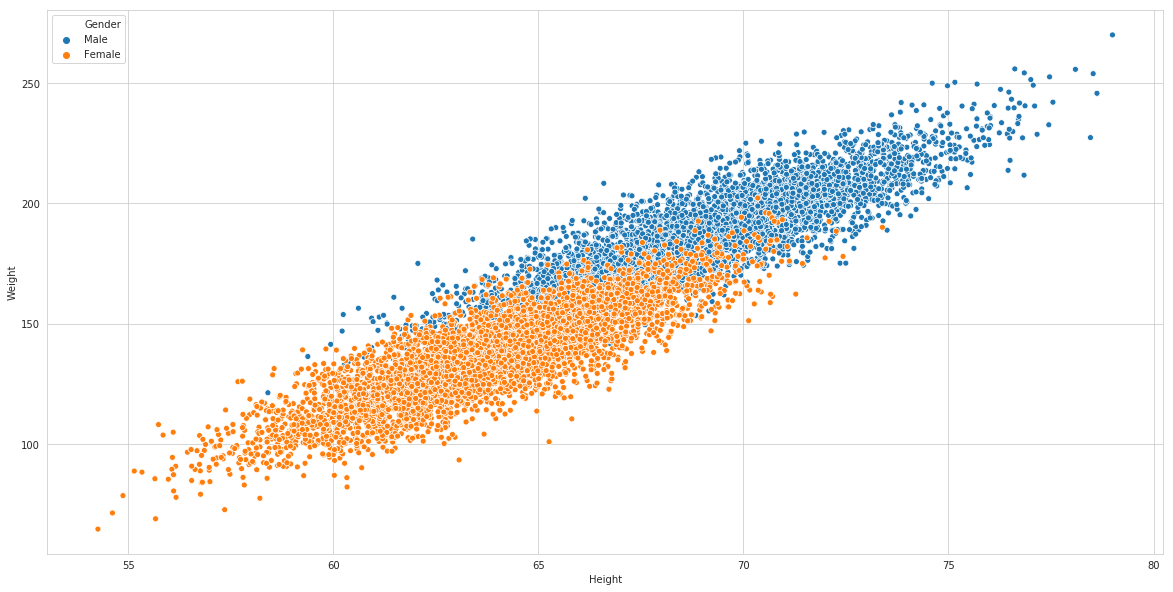

In [80]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x="Height", y="Weight", data=df, hue="Gender")

In [65]:
#splitting dataset into 80% training and 20% testing dataset
df_encoded_train, df_encoded_test = train_test_split(df_encoded, test_size = 0.2)

In [66]:
lr = LinearRegression()

features_train = df_encoded_train.drop(columns = 'Weight')
target_train = df_encoded_train.Weight

features_test = df_encoded_test.drop(columns = 'Weight')
target_test = df_encoded_test.Weight

lr.fit(features_train, target_train)
coefficients = lr.coef_

print(f'Coefficient of Female is {coefficients[0]}')
print(f'Coefficient of Male is {coefficients[1]}')
print(f'Coefficient of Height is {coefficients[2]}')

Coefficient of Female is -9.762419800915543
Coefficient of Male is 9.762419800915536
Coefficient of Height is 5.962471318514564


In [67]:
y_pred = lr.predict(features_test)

# R2 Score
score = r2_score(target_test, y_pred)
print('R2 score of this model is ', score)

R2 score of this model is  0.9029778234331295


In [68]:
# Mean Absolute Error
mae = mean_absolute_error(target_test, y_pred)
print('Mean Absolte Error of this model is ', mae)

Mean Absolte Error of this model is  7.938446064041516


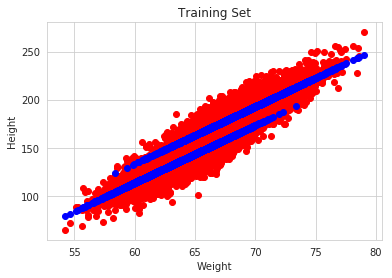

In [75]:
plt.scatter(features_train['Height'],target_train,color='red')
plt.scatter(features_train['Height'], lr.predict(features_train),color='blue')
plt.title('Training Set')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

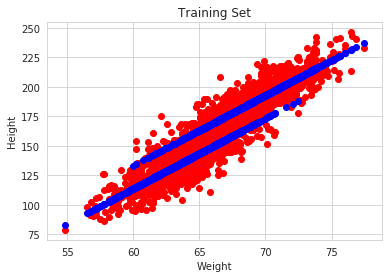

In [74]:
plt.scatter(features_test['Height'],target_test,color='red')
plt.scatter(features_test['Height'], y_pred,color='blue')
plt.title('Training Set')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()